#                     Sales Earning Prediction of New Video Game

# Preprocessing Data for Sales Earning Prediction Of New Video Game....

1. Load training dataset from CSV file.
2. Load testing dataset from  CSV file
3. Sacled the data in range between 0 and 1.
4. Create new pandas dataframe object from the sacled data.
5. Save the dataframe to new CSV file.
6. Visualize the data using matplotlib.

# Now importing the required library which is required us....

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1). Load the Training Dataset to our notebook

In [2]:
# Training Data....

import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_f64b5f27fc854b7f80899f2b97ec10fd = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='bGF0dMytzj6VWck006qxWXmPaqh5yrlBh1ClkiO9d36M',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_f64b5f27fc854b7f80899f2b97ec10fd.get_object(Bucket='alex-donotdelete-pr-2ol1y2nhtgiuwv',Key='sales_data_training.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_training_data = pd.read_csv(body)
df_training_data.head()


,critic_rating,is_action,is_exclusive_to_us,is_portable,is_role_playing,is_sequel,is_sports,suitable_for_kids,total_earnings,unit_price
0,3.5,1,0,1,0,1,0,0,132717,59.99
1,4.5,0,0,0,0,1,1,0,83407,49.99
2,3.0,0,0,0,0,1,1,0,62423,49.99
3,4.5,1,0,0,0,0,0,1,69889,39.99
4,4.0,1,0,1,0,1,0,1,161382,59.99


# 2). Load the Testing Dataset to our notebook

In [3]:
#testing Data....

body = client_f64b5f27fc854b7f80899f2b97ec10fd.get_object(Bucket='alex-donotdelete-pr-2ol1y2nhtgiuwv',Key='sales_data_test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_test_data = pd.read_csv(body)
df_test_data.head()


,critic_rating,is_action,is_exclusive_to_us,is_portable,is_role_playing,is_sequel,is_sports,suitable_for_kids,total_earnings,unit_price
0,3.5,1,1,1,0,1,0,1,247537,59.99
1,2.5,0,0,0,1,1,0,0,73960,59.99
2,3.5,0,0,0,0,1,1,0,82671,59.99
3,4.0,1,1,0,0,1,0,0,137456,39.99
4,2.0,1,0,1,0,1,0,0,89639,59.99


# 3).  Sacled the data in range between 0 and 1.

In [4]:
# Data needs to be scaled to a small range like 0 to 1 for the neural network to work well.

scaler=MinMaxScaler(feature_range=(0,1))
scaled_training=scaler.fit_transform(df_training_data)
scaled_testing=scaler.transform(df_test_data)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Normalization of the Label for Prediction

In [5]:
print("Note : Total_earnings values were scaled by multiplying by {:0.10f} and adding {:0.6f}".format(scaler.scale_[8],scaler.min_[8]))

Note : Total_earnings values were scaled by multiplying by 0.0000036968 and adding -0.115913


# 4). Create new DataFrame from the Scaled Data

In [6]:
# Create new pandas Dataframe object from the scaled data

scaled_training_df=pd.DataFrame(scaled_training,columns=df_training_data.columns.values)
scaled_testing_df=pd.DataFrame(scaled_training,columns=df_test_data.columns.values)


# 5). Save the dataframe to new CSV file.

In [7]:
#Save scaled data dataframe to new CSV file

scaled_training_df.to_csv("Scaled_Sales_Training_data.csv",index=False)
scaled_testing_df.to_csv("Scaled_Sales_Testing_data.csv",index=False)


# Data Visualization

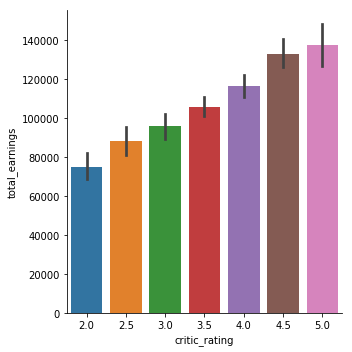

In [9]:
import seaborn as sb

sb.catplot('critic_rating','total_earnings',data=df_training_data,kind='bar')

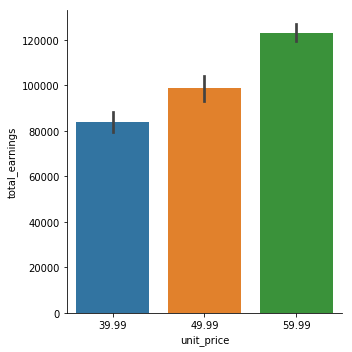

In [10]:
sb.catplot('unit_price','total_earnings',data=df_training_data,kind='bar')

# Craete Model :-

1). Importing all DeepLearning Library



In [11]:
from keras.models import Sequential
from keras.layers import *

Using TensorFlow backend.


# Load the Scaled dataset....

In [12]:

body = client_f64b5f27fc854b7f80899f2b97ec10fd.get_object(Bucket='alex-donotdelete-pr-2ol1y2nhtgiuwv',Key='Scaled_Sales_Training_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
training_data = pd.read_csv(body)
training_data.head()


,critic_rating,is_action,is_exclusive_to_us,is_portable,is_role_playing,is_sequel,is_sports,suitable_for_kids,total_earnings,unit_price
0,0.500000,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.799179,1.0
1,0.166667,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.157502,1.0
2,0.500000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.189704,1.0
3,0.666667,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.392233,0.0
4,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.215464,1.0


# Creating Input X and Label Y for Neural Network

In [13]:
# Creating Input and Labels for the Neural Network

X=training_data.drop('total_earnings',axis=1).values
Y=training_data[['total_earnings']].values


# Defining the Model

In [14]:
model = Sequential()
model.add(Dense(50,input_dim=9,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(50,activation="relu"))
model.add(Dense(1,activation="linear"))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                500       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 10,701
Trainable params: 10,701
Non-trainable params: 0
_________________________________________________________________


# Now Compile the Model  

In [15]:
model.compile(loss="mean_squared_error",optimizer="adam", metrics=['accuracy'])

# Train the Model

In [16]:
history = model.fit(
    X,
    Y,
    epochs=50,
    shuffle=True,
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
 - 19s - loss: 0.0223 - acc: 0.0000e+00
Epoch 2/50
 - 18s - loss: 0.0060 - acc: 0.0000e+00
Epoch 3/50
 - 15s - loss: 0.0020 - acc: 0.0000e+00
Epoch 4/50
 - 16s - loss: 0.0010 - acc: 0.0000e+00
Epoch 5/50
 - 15s - loss: 5.9903e-04 - acc: 0.0000e+00
Epoch 6/50
 - 12s - loss: 4.2517e-04 - acc: 0.0000e+00
Epoch 7/50
 - 16s - loss: 2.8479e-04 - acc: 0.0000e+00
Epoch 8/50
 - 13s - loss: 2.1863e-04 - acc: 0.0000e+00
Epoch 9/50
 - 16s - loss: 1.5999e-04 - acc: 0.0000e+00
Epoch 10/50
 - 15s - loss: 1.4489e-04 - acc: 0.0000e+00
Epoch 11/50
 - 15s - loss: 1.2464e-04 - acc: 0.0000e+00
Epoch 12/50
 - 15s - loss: 1.0262e-04 - acc: 0.0000e+00
Epoch 13/50
 - 15s - loss: 9.6068e-05 - acc: 0.0000e+00
Epoch 14/50
 - 18s - loss: 7.4339e-05 - acc: 0.0000e+00
Epoch 15/50
 - 17s - loss: 6.7970e-05 - acc: 0.0000e+00
Epoch 16/50
 - 14s - loss: 6.1688e-05 - acc: 0.0000e+00
Epoch 17/50
 - 14s - loss: 5.6709e-05 - acc: 0.0000e+00
Epoch 18/50
 - 16s - loss

# Visiualization of Loss of Predictive Model

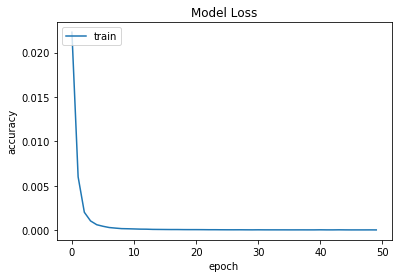

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# Now Load the Separated Scaled Test dataset

In [18]:
#load the separated test dataset
body = client_f64b5f27fc854b7f80899f2b97ec10fd.get_object(Bucket='alex-donotdelete-pr-2ol1y2nhtgiuwv',Key='Scaled_Sales_Testing_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
test_data = pd.read_csv(body)
test_data.head()


,critic_rating,is_action,is_exclusive_to_us,is_portable,is_role_playing,is_sequel,is_sports,suitable_for_kids,total_earnings,unit_price
0,0.500000,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.799179,1.0
1,0.166667,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.157502,1.0
2,0.500000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.189704,1.0
3,0.666667,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.392233,0.0
4,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.215464,1.0


# Now Separating the input X and label Y from Test dataset for Neural Network

In [19]:

X_test=test_data.drop('total_earnings',axis=1).values
Y_test=test_data[['total_earnings']].values


# Now its time to Evaluate the Model

In [20]:
test_error_rate=model.evaluate(X_test,Y_test,verbose=0)
print("The Mean Squared Error (MSE) for the test dataset is : {}".format(test_error_rate[0]))

The Mean Squared Error (MSE) for the test dataset is : 1.4243853802327067e-05


The error is quit very small it means that our model performance is very good enough.

# Now We Make The New Prediction On New Dataset

Load the new data set so we make to use to make a prediction

In [21]:

body = client_f64b5f27fc854b7f80899f2b97ec10fd.get_object(Bucket='alex-donotdelete-pr-2ol1y2nhtgiuwv',Key='proposed_new_product.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
new_data = pd.read_csv(body)
new_data.head()


,critic_rating,is_action,is_exclusive_to_us,is_portable,is_role_playing,is_sequel,is_sports,suitable_for_kids,unit_price
0,0.7,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.8


# Make the Prediction With the Neural Network

In [22]:
prediction=model.predict(new_data)

# For Final Result

Grab just the first element of the first prediction (since that's the only have one)

In [23]:
prediction=prediction[0][0]
print("Prediction for new video game earning is : {}".format(prediction))

Prediction for new video game earning is : 0.8412892818450928


# Rescale the Predicted data

Re-scale the dat from the 0 to 1 range back to dollars (because the earning is in dollar).
These constant are from when the data was originally scaled down to 0-1 range

In [24]:
prediction = prediction+0.1159
prediction = prediction/0.0000036968

print("Earning Prediction for Proposed New Video Game is ${}".format(prediction))

Earning Prediction for Proposed New Video Game is $258923.73994944082
